# Checkpoint 1: Data Cleaning 1

### 1. Load the companies and rounds2 into 2 data frames, name them companies and rounds2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

companies = pd.read_csv('companies.csv', encoding = 'unicode_escape')
rounds2 = pd.read_csv('rounds2.csv', encoding = 'unicode_escape')

In [2]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
len(list(rounds2['company_permalink'].unique()))

66370

In [7]:
companies['permalink'] = companies['permalink'].str.lower()
len(list(companies.permalink.value_counts()))

66368

Merge above 2 dataframes( companies, rounds2), name the merged frame as 'master_frame'



In [8]:
master_frame = pd.merge(rounds2, companies, left_on = 'company_permalink', right_on = 'permalink')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114942 non-null  object 
 1   funding_round_permalink  114942 non-null  object 
 2   funding_round_type       114942 non-null  object 
 3   funding_round_code       31139 non-null   object 
 4   funded_at                114942 non-null  object 
 5   raised_amount_usd        94958 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [9]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [10]:
master_frame.funding_round_type.value_counts()

venture                  55493
seed                     30518
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

Data Cleaning

In [11]:
# 1. Removing null values

In [12]:
master_frame.isnull().sum(axis=0) #counting null values based on columns

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [13]:
# 2. Dropping funding_round_code column

In [14]:
master_frame = master_frame.drop(['funding_round_code'], axis = 1)
master_frame.isnull().sum(axis = 0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [15]:
# 3. Dropping rows with null values in relevant columns('raised_amount_usd', 'category_list','country_code')

In [16]:
master_frame = master_frame[master_frame['raised_amount_usd'].notnull()]


In [17]:
master_frame = master_frame[master_frame['country_code'].notnull()]


In [18]:
master_frame = master_frame[master_frame['category_list'].notnull()]


In [19]:
master_frame.shape

(88529, 15)

In [20]:
master_frame.isnull().sum(axis = 0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

# Checkpoint 2: Funding Type Analysis

### 4. Representative value of the investment type for each of the 4 types venture, angel, seed, private equity in millions

In [21]:
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
ft_amount = master_frame.pivot_table(values = 'raised_amount_usd', index = 'funding_round_type', aggfunc= 'mean')
ft_amount

,raised_amount_usd
funding_round_type,
angel,0.971574
convertible_note,1.337187
debt_financing,17.167653
equity_crowdfunding,0.509898
grant,4.512698
non_equity_assistance,0.480753
post_ipo_debt,169.451790
post_ipo_equity,66.077059
private_equity,73.938486


In [22]:
#Considering above mentioned four types of funding, venture is the most representative

In [23]:
master_frame.isnull().sum(axis = 0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

In [24]:
master_frame = master_frame.drop(['state_code','region','city','founded_at'], axis = 1)

In [25]:
master_frame.isnull().sum(axis = 0)

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
permalink                     0
name                          1
homepage_url               3251
category_list                 0
status                        0
country_code                  0
dtype: int64

In [26]:
master_frame.shape

(88529, 11)

In [27]:
master_frame2 = master_frame[(master_frame['funding_round_type'] == 'angel')|
                             (master_frame['funding_round_type'] == 'seed')|
                            (master_frame['funding_round_type'] == 'venture')|
                            (master_frame['funding_round_type'] == 'private_equity')]
master_frame2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75124 entries, 0 to 114940
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        75124 non-null  object 
 1   funding_round_permalink  75124 non-null  object 
 2   funding_round_type       75124 non-null  object 
 3   funded_at                75124 non-null  object 
 4   raised_amount_usd        75124 non-null  float64
 5   permalink                75124 non-null  object 
 6   name                     75123 non-null  object 
 7   homepage_url             72564 non-null  object 
 8   category_list            75124 non-null  object 
 9   status                   75124 non-null  object 
 10  country_code             75124 non-null  object 
dtypes: float64(1), object(10)
memory usage: 6.9+ MB


In [28]:
master_frame2.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [29]:
master_frame2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.043360,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN


Since 'venture' is the most representative type of funding, we will remove other types by removing the rows

In [30]:
master_frame_venture = master_frame2[master_frame2['funding_round_type'] == 'venture']

In [31]:
master_frame_venture.shape

(47809, 11)

# Checkpoint 3: Country Analysis

In [32]:
top9 = master_frame_venture.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')

In [33]:
top9.head()
top9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, ARE to ZAF
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   raised_amount_usd  97 non-null     float64
dtypes: float64(1)
memory usage: 1.5+ KB


In [34]:
top9 = top9.sort_values(by = 'raised_amount_usd', ascending= False)
top9.head()

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668


Data frame top9 containing top 9 countries wrt total investment they received

### 2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [35]:
top9 = top9.head(9)
top9

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


In [36]:
mapping = pd.read_csv('mapping.csv', encoding = 'unicode_escape')
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [37]:
master_frame_venture.category_list.value_counts()

Biotechnology                                            5402
Software                                                 3960
Health Care                                              1375
Clean Technology                                         1268
Enterprise Software                                      1149
                                                         ... 
Education|Kids|Web Tools                                    1
Manufacturing|Publishing|Software                           1
Apps|Cloud Data Services|Mobile                             1
Information Technology|Interface Design|SaaS|Software       1
Development Platforms|Manufacturing|Market Research         1
Name: category_list, Length: 9946, dtype: int64

# Checkpoint 4: Sector Analysis 1

### 1. Extract the primary sector of each category list from the category_list column

In [38]:
master_frame_venture['category_list'] = master_frame_venture['category_list'].apply(lambda x: x.split('|')[0])
master_frame_venture.head()

<ipython-input-38-430de5de1be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame_venture['category_list'] = master_frame_venture['category_list'].apply(lambda x: x.split('|')[0])


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000000,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700000,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA


In [39]:
master_frame_venture.category_list.value_counts()

Biotechnology          6794
Software               4102
Advertising            2215
Health Care            1804
Enterprise Software    1752
                       ... 
Social Television         1
Social Games              1
Space Travel              1
High Schools              1
Service Industries        1
Name: category_list, Length: 603, dtype: int64

In [40]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [41]:
mapping = pd.melt(mapping, id_vars= 'category_list', value_vars=['Automotive & Sports','Cleantech / Semiconductors',
                                                                'Entertainment','Health','Manufacturing',
                                                                'News, Search and Messaging','Others',
                                                                'Social, Finance, Analytics, Advertising'])
mapping.head()

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [42]:
mapping = mapping[mapping.value != 0]
mapping.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [43]:
mapping.category_list.value_counts()

Business Information Systems          1
Electronic Health Records             1
Consulting                            1
Mobile Software Tools                 1
Point of Sale                         1
                                     ..
Career Planning                       1
Mobile Video                          1
Adventure Travel                      1
Direct Advertising                    1
Health Care Information Technology    1
Name: category_list, Length: 687, dtype: int64

In [44]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 8 to 5479
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   variable       687 non-null    object
 2   value          687 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.5+ KB


In [45]:
# mapping = mapping.drop('value', axis = 1)
mapping.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [46]:
mapping = mapping.rename(columns = {'variable': 'main_sector'})
mapping.head()

,category_list,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


### 2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [47]:
master_frame_venture = master_frame_venture.merge(mapping, how = 'left', on = 'category_list')
master_frame_venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,Entertainment,1.0
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,"News, Search and Messaging",1.0
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,Cleantech / Semiconductors,1.0
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000000,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,NaN,NaN
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700000,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,NaN,NaN


In [48]:
master_frame_venture.main_sector.value_counts()

Others                                     11316
Cleantech / Semiconductors                  9878
Social, Finance, Analytics, Advertising     6930
News, Search and Messaging                  5903
Health                                      3951
Manufacturing                               3281
Entertainment                               2698
Automotive & Sports                          735
Name: main_sector, dtype: int64

In [49]:
master_frame_venture.main_sector.isnull().sum()

3117

In [50]:
master_frame_venture = master_frame_venture[master_frame_venture.main_sector.notnull()]
master_frame_venture.main_sector.isnull().sum()

0

In [51]:
master_frame_venture.shape

(44692, 13)

Filtering the dataframe for the first 3 english speaking countries USA, GBR, IND

In [52]:
master_frame_venture = master_frame_venture[(master_frame_venture.country_code == 'USA')|
                                           (master_frame_venture.country_code == 'GBR')|
                                           (master_frame_venture.country_code == 'IND')]
master_frame_venture.shape

(36187, 13)

# Checkpoint 5: Sector Analysis 2

### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector.

In [53]:
D1 = master_frame_venture[(master_frame_venture.country_code == 'USA')&
                         (master_frame_venture.raised_amount_usd >= 5) &
                         (master_frame_venture.raised_amount_usd <= 15)]
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,main_sector,value
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000000,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,"News, Search and Messaging",1.0
29,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11.999347,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers,operating,USA,Others,1.0
33,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15.000000,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,Manufacturing,1.0
34,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5.000000,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,Manufacturing,1.0
35,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,03-02-2010,5.150000,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,Manufacturing,1.0


In [54]:
D2 = master_frame_venture[(master_frame_venture.country_code == 'GBR')&
                         (master_frame_venture.raised_amount_usd >= 5) &
                         (master_frame_venture.raised_amount_usd <= 15)]
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,main_sector,value
151,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5.500000,/organization/365scores,365Scores,http://biz.365scores.com,Android,operating,GBR,"Social, Finance, Analytics, Advertising",1.0
336,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8.468328,/organization/7digital,7digital,http://about.7digital.com,Content Creators,acquired,GBR,Entertainment,1.0
337,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10.000000,/organization/7digital,7digital,http://about.7digital.com,Content Creators,acquired,GBR,Entertainment,1.0
364,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.000000,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,Entertainment,1.0
365,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.800000,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,Entertainment,1.0


In [55]:
D3 = master_frame_venture[(master_frame_venture.country_code == 'IND')&
                         (master_frame_venture.raised_amount_usd >= 5) &
                         (master_frame_venture.raised_amount_usd <= 15)]
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,Entertainment,1.0
77,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6.369507,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,Others,1.0
1147,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8.180000,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment,operating,IND,Entertainment,1.0
1882,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,01-07-2014,5.000000,/organization/akosha,Akosha,http://www.akosha.com,Consumer Internet,operating,IND,"Social, Finance, Analytics, Advertising",1.0
2369,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,17-06-2013,5.500000,/organization/amagi-media-labs,Amagi Media Labs,http://amagi.com,Advertising,operating,IND,"Social, Finance, Analytics, Advertising",1.0


### calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.



### Total No and Sum of investment countrywise

In [56]:
usa_no = D1.main_sector.value_counts()
usa_no

Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [57]:
len(D1.index)

11149

In [58]:
company_usa = D1[D1['main_sector']=='Others']
company_usa = company_usa.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_usa.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/organization/virtustream,64.300000
/organization/capella,54.968051
/organization/airtight-networks,54.201907
/organization/decarta,52.100000
/organization/black-duck-software,51.000000
...,...
/organization/g2-switchworks,5.000000
/organization/quiet-logistics,5.000000
/organization/qualaroo,5.000000


In [59]:
company_usa1 = D1[D1['main_sector']=='Cleantech / Semiconductors']
company_usa1 = company_usa1.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_usa1.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/organization/biodesix,75.300000
/organization/tigo-energy,68.739496
/organization/forsight-labs,61.300001
/organization/rheonix,56.124758
/organization/scienergy,55.375423
...,...
/organization/new-leaf-paper,5.000000
/organization/nexus-biosystems,5.000000
/organization/omnipv,5.000000


In [60]:
company_usa2 = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company_usa2 = company_usa2.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_usa2.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/organization/intacct,61.8
/organization/lotame,59.7
/organization/choicestream,58.3
/organization/damballa,55.0
/organization/zoove,54.8
...,...
/organization/karmic-labs,5.0
/organization/kaizen-platform,5.0
/organization/jumptap,5.0


In [61]:
gbr_no = D2.main_sector.value_counts()
gbr_no

Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [62]:
len(D2.index)

577

In [63]:
company_gbr = D2[D2['main_sector']=='Others']
company_gbr = company_gbr.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_gbr.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/organization/electric-cloud,37.000000
/organization/sensage,36.250000
/organization/enigmatic,32.500000
/organization/silverrail-technologies,29.000000
/organization/opencloud,27.972766
...,...
/organization/bacula-systems,5.000000
/organization/vector-watch,5.000000
/organization/udex,5.000000


In [64]:
company_gbr1 = D2[D2['main_sector']=='Cleantech / Semiconductors']
company_gbr1 = company_gbr1.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_gbr1.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/organization/eusa-pharma,35.600000
/organization/horizon-discovery,31.353719
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h,29.132906
/organization/elixent,25.000000
/organization/takeda-cambridge,22.340000
...,...
/organization/lamellar-biomedical,5.301059
/organization/mmic-solutions,5.250000
/organization/flowline,5.104587


In [65]:
company_gbr2 = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company_gbr2 = company_gbr2.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_gbr2.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/organization/celltick-technologies,37.500000
/organization/mythings,34.000000
/organization/imagini,28.550000
/organization/sumup,24.293649
/organization/amplience,24.200000
...,...
/organization/memrise,5.100000
/organization/government-grant-and-tax-consultants,5.015782
/organization/tamoco,5.000000


In [66]:
ind_no = D3.main_sector.value_counts()
ind_no

Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [67]:
len(D3.index)

299

In [68]:
company_ind = D3[D3['main_sector']=='Others']
company_ind = company_ind.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_ind.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/organization/firstcry-com,39.0
/organization/myntra,38.0
/organization/commonfloor,32.9
/organization/pepperfry-com,28.0
/organization/itzcash-card-ltd,25.0
...,...
/organization/tastykhana,5.0
/organization/parcelled-in,5.0
/organization/securens,5.0


In [69]:
company_ind1 = D3[D3['main_sector']=='News, Search and Messaging']
company_ind1 = company_ind1.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_ind1.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/organization/gupshup-technology-india-pvt-ltd,33.000000
/organization/imimobile,23.000000
/organization/sms-gupshup,22.000000
/organization/roadrunnr,21.000000
/organization/hike,21.000000
/organization/matrimony-com,20.400000
/organization/guruji,15.000000
/organization/mobile2win-india,15.000000
/organization/bluestone-com,15.000000


In [70]:
company_ind2 = D3[D3['main_sector']=='Entertainment']
company_ind2 = company_ind2.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_ind2.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/organization/yebhi,21.00
/organization/holidayiq-com,20.00
/organization/yatra-online,19.50
/organization/apalya,15.50
/organization/octro-2,15.00
/organization/collectabillia-com,15.00
/organization/moonfrog-labs,15.00
/organization/cleartrip,13.40
/organization/games2win,11.00


In [71]:
usa_amount = D1.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc = 'sum')
usa_amount.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
main_sector,
Others,26089.280296
Cleantech / Semiconductors,21181.003033
"Social, Finance, Analytics, Advertising",16680.695048
"News, Search and Messaging",13796.816094
Health,8200.859357
Manufacturing,7258.553378
Entertainment,5000.212982
Automotive & Sports,1454.104361


In [72]:
usa_amount.raised_amount_usd.sum()

99661.524549

In [73]:
gbr_amount = D2.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc = 'sum')
gbr_amount.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
main_sector,
Others,1249.124289
Cleantech / Semiconductors,1136.905008
"Social, Finance, Analytics, Advertising",821.888357
"News, Search and Messaging",615.746235
Entertainment,461.511059
Manufacturing,361.940335
Health,214.537510
Automotive & Sports,167.051565


In [74]:
gbr_amount.raised_amount_usd.sum()

5028.704358

In [75]:
ind_amount = D3.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc = 'sum')
ind_amount.sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
main_sector,
Others,1007.409507
"News, Search and Messaging",433.834545
"Social, Finance, Analytics, Advertising",290.543500
Entertainment,280.830000
Manufacturing,200.900000
Health,167.740000
Cleantech / Semiconductors,165.380000
Automotive & Sports,136.900000


In [76]:
ind_amount.raised_amount_usd.sum()

2683.537552

### 1. A plot showing the representative amount of investment in each funding type.<br>
### This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [77]:
# ft_amount.reset_index(inplace = True)
print(ft_amount.head())
ft_amount_bar = sns.barplot(x= 'funding_round_type', y = 'raised_amount_usd', data = ft_amount)
ft_amount_bar.set_xticklabels(ft_amount_bar.get_xticklabels(), rotation=45)
plt.show()

                     raised_amount_usd
funding_round_type                    
angel                         0.971574
convertible_note              1.337187
debt_financing               17.167653
equity_crowdfunding           0.509898
grant                         4.512698


NameError: name 'sns' is not defined

### A plot showing the top 9 countries against the total amount of investments of funding type FT.<br> This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.  

In [78]:
top9.reset_index(inplace = True)
print(top9.head())
top9_bar = sns.barplot(x= 'country_code', y = 'raised_amount_usd', data = top9)

  country_code  raised_amount_usd
0          USA      420068.029342
1          CHN       39338.918773
2          GBR       20072.813004
3          IND       14261.508718
4          CAN        9482.217668


NameError: name 'sns' is not defined

### 3.  A plot showing the number of investments in the top 3 sectors <br>of the top 3 countries on one chart (for the chosen investment type FT).<br> This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3

In [79]:
usa_top3 = D1.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc= 'count')
usa_top3 = usa_top3.sort_values(by = 'raised_amount_usd', ascending = False)
usa_top3 = usa_top3.rename(columns = {'raised_amount_usd': 'no of Investors'})
usa_top3 = usa_top3.head(3)
usa_top3['country'] = 'USA'
usa_top3

,no of Investors,country
main_sector,,
Others,2923,USA
Cleantech / Semiconductors,2297,USA
"Social, Finance, Analytics, Advertising",1912,USA


In [80]:
gbr_top3 = D2.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc= 'count')
gbr_top3 = gbr_top3.sort_values(by = 'raised_amount_usd', ascending = False)
gbr_top3 = gbr_top3.rename(columns = {'raised_amount_usd': 'no of Investors'})
gbr_top3 = gbr_top3.head(3)
gbr_top3['country'] = 'GBR'
gbr_top3

,no of Investors,country
main_sector,,
Others,143,GBR
Cleantech / Semiconductors,127,GBR
"Social, Finance, Analytics, Advertising",98,GBR


In [81]:
ind_top3 = D3.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc= 'count')
ind_top3 = ind_top3.sort_values(by = 'raised_amount_usd', ascending = False)
ind_top3 = ind_top3.rename(columns = {'raised_amount_usd': 'no of Investors'})
ind_top3 = ind_top3.head(3)
ind_top3['country'] = 'IND'
ind_top3

,no of Investors,country
main_sector,,
Others,109,IND
"News, Search and Messaging",52,IND
Entertainment,33,IND


In [82]:
countryplot = pd.concat([usa_top3, gbr_top3, ind_top3])
countryplot.reset_index(inplace = True)
countryplot.head()

,main_sector,no of Investors,country
0,Others,2923,USA
1,Cleantech / Semiconductors,2297,USA
2,"Social, Finance, Analytics, Advertising",1912,USA
3,Others,143,GBR
4,Cleantech / Semiconductors,127,GBR


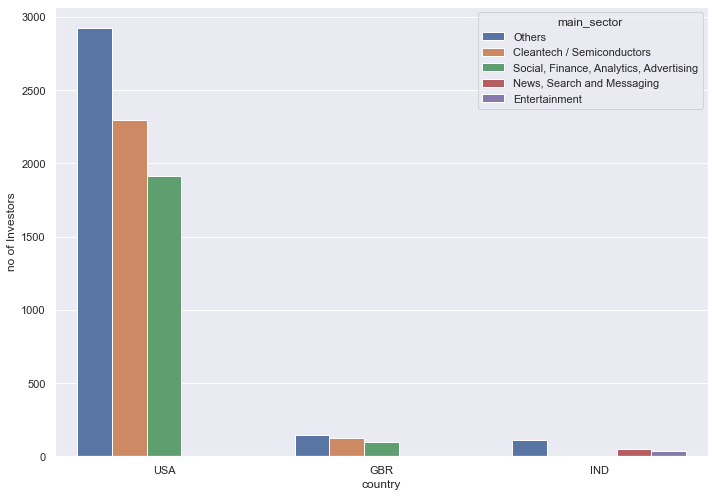

In [83]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
barplot = sns.barplot(x= 'country', y = 'no of Investors', hue = 'main_sector', data = countryplot)
